<a href="https://colab.research.google.com/github/Venettov/Riveraruiz_GIS/blob/main/PS0_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install geopandas==1.0.1
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #visualization library
import geopandas as gpd #gis/maps library

import mapclassify

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe




In [11]:

# The shapefile informatition was downloaded from: https://data.humdata.org/dataset/cod-ab-pri?
# I could donwload the zile file directly from the source and get the same result (line below)
! wget -q -O pr-counties.zip https://data.humdata.org/dataset/e71a08a7-8529-4964-9ad7-7319e6ec05f8/resource/d3b8f932-16cf-4ecb-89b8-c2611922fcb4/download/pri_adm_2019_shp.zip

# I saved the file on Google Drive and created the link below:
#! wget -q -O pr-counties.zip https://drive.google.com/uc?id=14I-sv4Q-3oCtdNXerqPGJZ9QkG37b48C&export=download

zip_ref = zipfile.ZipFile('pr-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
prC0=gpd.read_file('pri_admbnda_adm1_2019.shp') #load the shapefile with gpd as prC
prC1=gpd.read_file('pri_admbndl_ALL_2019.shp') #load the shapefile with gpd as prC


<Axes: >

<Axes: >

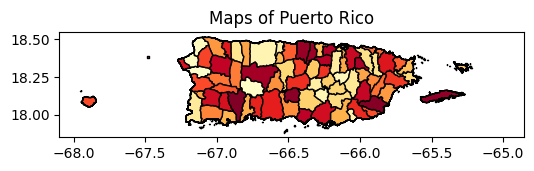

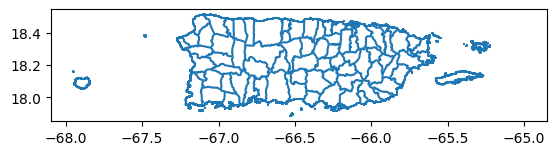

In [36]:
#prC0.plot()
fig, ax = plt.subplots(1, figsize=(6,10))
prC0.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

ax.title.set_text("Maps of Puerto Rico")

prC1.plot()

In [37]:
prC0.dtypes
#prC0.head()
#prC0.tail()
#prC0.shape
#prC0.columns
#prC0.explore()

,0
ADM0_ES,object
ADM0_PCODE,object
ADM1_ES,object
ADM1_PCODE,object
geometry,geometry


<Axes: >

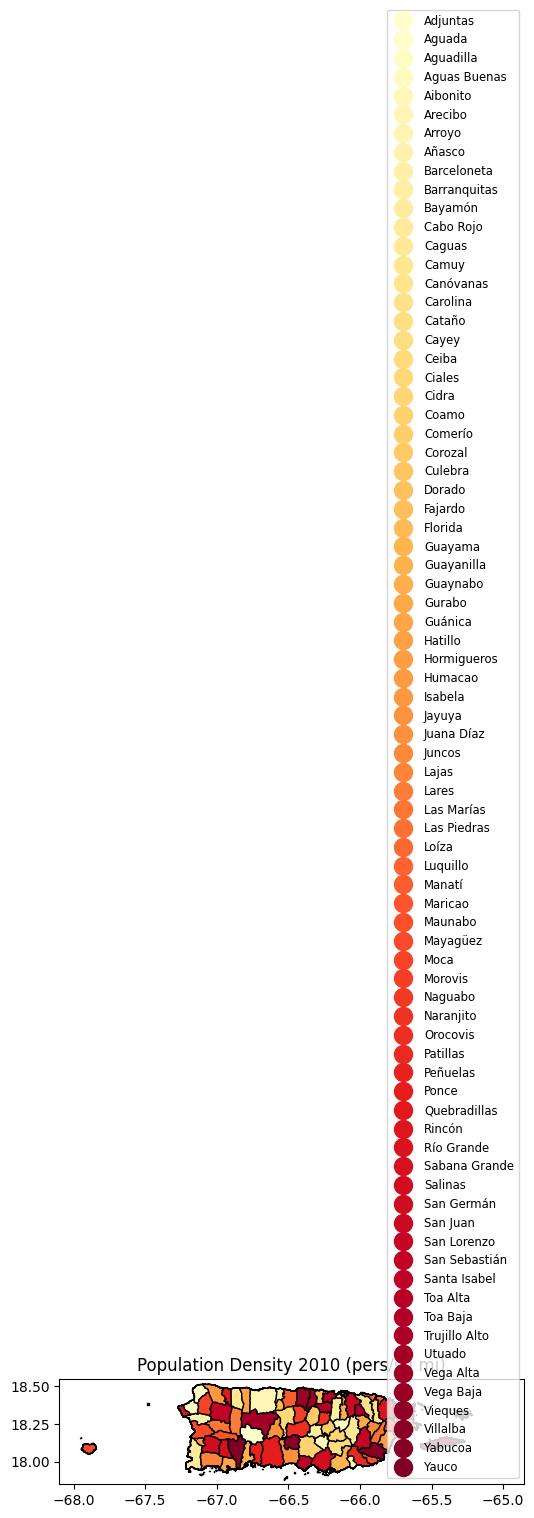

In [42]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))

#prC0.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1) #

prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Population Density 2010 (pers/sq mi)")
